# Building The First TSAI Neural Network

- This notebook is a refactoring of the Session 4 Colab file
    - Model-related code are present in `model.py`
    - Utility stuff (plotting, dataloading etc) are present in `utils.py`

In [1]:
# Importing all relevant libraries and functions for execution
# Note: This type of import is not always recommended because of 
# namespace collision, import size and confusion about which module contains
# which function. Current task is not code-heavy so using it for convenience
from model import *
from utils import *
import matplotlib.pyplot as plt

In [2]:
# Defining global variables
batch_size = 512
num_epochs = 20

# Defining a kwarg dict to store param values for train & test dataloader
loader_kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

In [3]:
# Check whether CUDA is available or not
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# Set device to cuda if available or not
device = 'cuda' if cuda else 'cpu'

CUDA Available? True


In [9]:
# Create MNIST train & test datasets and convert them to dataloaders
train_data, test_data = create_train_test_dataset()
train_loader, test_loader = create_train_test_loader(train_data, test_data, **loader_kwargs)

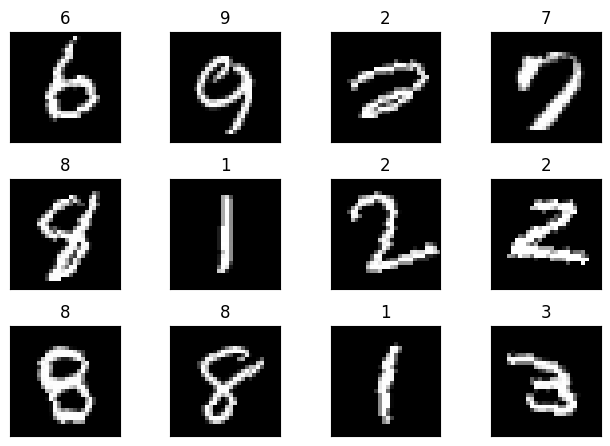

In [11]:
# Investigate a few elements of the train loader
# Get the first set of data and label values
batch_data, batch_label = next(iter(train_loader)) 

# Define a matplotlib figure
fig = plt.figure()

# Displaying the first 12 images of the batch
for i in range(12):
    plt.subplot(3, 4, i+1) # Defining a 2D grid 
    plt.tight_layout() # Reducing space between grid elements
    plt.imshow(batch_data[i].squeeze(0), cmap='gray') # Display image (obtained from squeezing)
    plt.title(batch_label[i].item()) # Display title
    plt.xticks([]) # Remove x axis ticks
    plt.yticks([]) # Remove y axis ticks

In [12]:
# Define our neural network model and display its structure
model = Net().to(device)
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [13]:
# Initialize variables to store loss & accuracy values for both train and test
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [14]:
# Train the model and assess metrics on test set for num_epochs
train_test_run(model, device, train_loader, test_loader, num_epochs, 
               train_acc, train_losses, test_acc, test_losses)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2377 Batch_id=117 Accuracy=60.47: 100%|██████████| 118/118 [00:30<00:00,  3.93it/s]


Test set: Average loss: 0.1972, Accuracy: 9394/10000 (93.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1080 Batch_id=117 Accuracy=94.60: 100%|██████████| 118/118 [00:23<00:00,  4.98it/s]


Test set: Average loss: 0.0738, Accuracy: 9755/10000 (97.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0893 Batch_id=117 Accuracy=96.58: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0615, Accuracy: 9783/10000 (97.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1098 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0471, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0626 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0433, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0407 Batch_id=117 Accuracy=97.85: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0373, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0658 Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0382, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0287 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0319, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1249 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0311, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0183 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0318, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0118 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0295, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0434 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0278, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0662 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0252, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0198 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0270, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0993 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0251, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0992 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0222, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0068 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0213, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0473 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0212, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0139 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0212, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0161 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [15]:
# Plot performance metrics on train & test
plot_loss_acc(train_losses, train_acc, test_losses, test_acc)

NameError: ignored